## Analysis of Healthy Brain Controls for GBM Retrotransposon Experiment

- Reference Genes: hg38 (GRCh38)
- Retrotransposons Source File: 
- Original Files came from the same study as the GBM dataset [bhaduriOuterRadialGliaLike2020] which references controls for an ASD study [Single-nucleus RNA sequencing of post-mortem brain tissue from Autism Spectrum Disorder patients](https://www.ncbi.nlm.nih.gov//bioproject/PRJNA434002)

| #   | Run        | Sample Name  | Instrument | Age | Sex    | Tissue                   |
| --- | ---------- | ------------ | ---------- | --- | ------ | ------------------------ |
| 1   | SRR9264382 | 5981_BA9_10x | Novaseq    | 44  | Female | Brain, prefrontal cortex |
| 2   | SRR9264389 | 5787_BA9_10x | Novaseq    | 39  | Male   | Brain, prefrontal cortex |
| 3   | SRR9264388 | 5609_BA9_10x | Novaseq    | 54  | Female | Brain, prefrontal cortex |
| 4   | SRR9264383 | 5546_BA9_10x | Novaseq    | 34  | Female | Brain, prefrontal cortex |

Re-analyzing Healthy Brain samples to match closer to the the pre-processing and quality control from the Bhaduri etal. paper. 

In [1]:
.libPaths(c("/scratch/samkyy/gete-gbm/renv/library/R-4.0/x86_64-pc-linux-gnu","/tmp/RtmpJsRC8Z/renv-system-library", .libPaths()))
.libPaths()

[1] "/scratch/samkyy/gete-gbm/renv/library/R-4.0/x86_64-pc-linux-gnu"                       
[2] "/home/samkyy/R/x86_64-pc-linux-gnu-library/4.0"                                        
[3] "/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/r/4.0.2/lib64/R/library"

In [2]:
resultsPath <- "~/scratch/gete-gbm/results"
getwd()

[1] "/scratch/samkyy/gete-gbm/results"

In [ ]:
source("~/scratch/gete-gbm/bin/util_monocle3.R")

In [3]:
library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(genefilter)
library(tidyverse)
library(RCurl)
library(scales)
# library(SingleCellExperiment)
library(AnnotationHub)
library(ensembldb)
# Packages for figure layout formatting
library(grid)
library(gridExtra)

Attaching SeuratObject

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ readr::spec()   masks genefilter::spec()
✖ tidyr::unpack() masks Matrix::unpack()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘packag

In [4]:
source("~/scratch/gete-gbm/bin/util.R")
source("~/scratch/gete-gbm/bin/util_seurat.R")
source("~/scratch/gete-gbm/bin/util_go.R")
source("~/scratch/gete-gbm/bin/util_viz.R")

Loading required package: Category

Loading required package: graph


Attaching package: 'graph'


The following object is masked from 'package:stringr':

    boundary





Attaching package: 'GOstats'


The following object is masked from 'package:AnnotationDbi':

    makeGOGraph






## Load Healthy Brain Count Matrices
2021-08-04:

In [95]:
brain <- Read10X("/home/samkyy/scratch/gete-gbm/data/2021-06-03_brain/aggr_Brain/outs/count/filtered_feature_bc_matrix")
brainRT <- Read10X("/home/samkyy/scratch/gete-gbm/data/2021-06-03_brain/aggr_BrainRT/outs/count/filtered_feature_bc_matrix")

In [96]:
dim(brain)
dim(brainRT) 
# n.genes by n.cells

[1] 36601  5421

[1] 1180 3229

Get intersect of cell names between hg38 mapped and retrotranposon mapped matrices to create Seurat Objects:

In [77]:
### find intersecting cell names between genes and retrotransposon datasets
cellnames <- intersect(colnames(brain),colnames(brainRT))
length(cellnames) # 3224 cells will be present in the combined sparse matrix

### Merge sparse matrices with intersecting cell names
brainInter <- rbind(brain[,cellnames],brainRT[,cellnames])

### Create Seurat Object of Neuroblastoma dataset with genes + retrotransposons genes
gte_brain <- CreateSeuratObject(counts=brainInter,project="healthybrains_GenesRetrotransposons",
                                       names.field = 2,names.delim = "-", min.features = 1000, min.cells = 30)
### Create Seurat Object of healthy brain dataset with only reference genes
brainInter <- brain[,cellnames]

ge_brain <- CreateSeuratObject(counts=brainInter,project="healthybrains_Refgenes",
                                       names.field = 2,names.delim = "-", min.features = 1000, min.cells = 30)

[1] 3224

Warning message:
"Non-unique features (rownames) present in the input matrix, making unique"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


In [94]:
dim(ge_brain)
dim(gte_brain)

[1] 14795  2832

[1] 15907  3057

In [78]:
# mkdirToday()
save(ge_brain,file="~/scratch/gete-gbm/results/2021-08-05/ge_brain.RData")
save(gte_brain,file="~/scratch/gete-gbm/results/2021-08-05/gte_brain.RData")

[1] "Current working directory: /scratch/samkyy/gete-gbm/results/2021-08-04"


Warning message in dir.create(file.path(maindir, subdir)):
"'/home/samkyy/scratch/gete-gbm/results/2021-08-04' already exists"


[1] "New working directory: /scratch/samkyy/gete-gbm/results/2021-08-04"


## Compute QC Metrics
2021-08-04:

In [ ]:
load("~/scratch/gete-gbm/results/2021-08-05/ge_brain.RData")
load("~/scratch/gete-gbm/results/2021-08-05/gte_brain.RData")

In [79]:
dim(ge_brain)
dim(gte_brain)

[1] 14795  2832

[1] 15907  3057

In [80]:
# number of genes per UMI 
gte_brain$log10GenesPerUMI <- log10(gte_brain$nFeature_RNA) / log10(gte_brain$nCount_RNA)
ge_brain$log10GenesPerUMI  <- log10(ge_brain$nFeature_RNA) / log10(ge_brain$nCount_RNA)

# mitochondrial ratio
gte_brain$mitoRatio <- PercentageFeatureSet(object = gte_brain, pattern = "^MT-")
ge_brain$mitoRatio <- PercentageFeatureSet(object = ge_brain, pattern = "^MT-")

head(ge_brain@meta.data)
head(gte_brain@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,log10GenesPerUMI,mitoRatio
,<fct>,<dbl>,<int>,<dbl>,<dbl>
AAACCTGGTCCATGAT-1,1,3482,2083,0.9369988,1.2636416
AAACGGGAGTAGCCGA-1,1,1733,1259,0.9571530,1.3271783
AAACGGGCATCGGTTA-1,1,4198,2503,0.9380130,2.8108623
AAACGGGTCCATGAAC-1,1,4181,2393,0.9330796,2.7266204
AAAGATGCACGACTCG-1,1,5029,2748,0.9290919,1.2129648
AAAGCAACACCGGAAA-1,1,1757,1230,0.9522719,0.6829824


,orig.ident,nCount_RNA,nFeature_RNA,log10GenesPerUMI,mitoRatio
,<fct>,<dbl>,<int>,<dbl>,<dbl>
AAACCTGGTCCATGAT-1,1,6097,2454,0.8955801,0.7216664
AAACGGGAGTAGCCGA-1,1,3164,1530,0.9098504,0.7269279
AAACGGGCATCGGTTA-1,1,5970,2801,0.9129599,1.9765494
AAACGGGTCCATGAAC-1,1,5562,2671,0.9149433,2.0496224
AAAGATGCACGACTCG-1,1,7305,3102,0.9037228,0.8350445
AAAGCAACACCGGAAA-1,1,3563,1528,0.8964776,0.3367948


In [81]:
### Add cell IDs 
gte_brain$cells <- colnames(gte_brain)
ge_brain$cells <- colnames(ge_brain)

sampleNames <- list("SRR9264382", "SRR9264383", "SRR9264388", "SRR9264389")
ageList <- c(44, 34, 54, 39)
ageListUnique <- c("F", "M")
sexList <- c("F", "F", "F", "M")

### Fill metadata columns
gte_brain$sample <- NA
ge_brain$sample <- NA
gte_brain$age <- NA
ge_brain$age <- NA
gte_brain$sex <- NA
ge_brain$sex <- NA

for(i in 1:length(sampleNames)) {
    gte_brain$sample[which(gte_brain$orig.ident == i)] <- sampleNames[[i]]
    ge_brain$sample[which(ge_brain$orig.ident == i)] <- sampleNames[[i]]
    
    gte_brain$age[which(gte_brain$orig.ident == i)] <- ageList[i]
    ge_brain$age[which(ge_brain$orig.ident == i)] <- ageList[i]

    gte_brain$sex[which(gte_brain$orig.ident == i)] <- sexList[i]
    ge_brain$sex[which(ge_brain$orig.ident == i)] <- sexList[i]
}

### Factorize the sample column and sex column

gte_brain$sample <- factor(gte_brain$sample, levels = sampleNames)
ge_brain$sample <- factor(ge_brain$sample, levels = sampleNames)

gte_brain$sex <- factor(gte_brain$sex, levels = ageListUnique)
ge_brain$sex <- factor(ge_brain$sex, levels = ageListUnique)

### Duplicate nUMI and nGene
gte_brain$nUMI <- gte_brain$nCount_RNA
gte_brain$nGene <- gte_brain$nFeature_RNA
ge_brain$nUMI <- ge_brain$nCount_RNA
ge_brain$nGene <- ge_brain$nFeature_RNA

head(ge_brain@meta.data)
head(gte_brain@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,log10GenesPerUMI,mitoRatio,cells,sample,age,sex,nUMI,nGene
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<fct>,<dbl>,<int>
AAACCTGGTCCATGAT-1,1,3482,2083,0.9369988,1.2636416,AAACCTGGTCCATGAT-1,SRR9264382,44,F,3482,2083
AAACGGGAGTAGCCGA-1,1,1733,1259,0.9571530,1.3271783,AAACGGGAGTAGCCGA-1,SRR9264382,44,F,1733,1259
AAACGGGCATCGGTTA-1,1,4198,2503,0.9380130,2.8108623,AAACGGGCATCGGTTA-1,SRR9264382,44,F,4198,2503
AAACGGGTCCATGAAC-1,1,4181,2393,0.9330796,2.7266204,AAACGGGTCCATGAAC-1,SRR9264382,44,F,4181,2393
AAAGATGCACGACTCG-1,1,5029,2748,0.9290919,1.2129648,AAAGATGCACGACTCG-1,SRR9264382,44,F,5029,2748
AAAGCAACACCGGAAA-1,1,1757,1230,0.9522719,0.6829824,AAAGCAACACCGGAAA-1,SRR9264382,44,F,1757,1230


,orig.ident,nCount_RNA,nFeature_RNA,log10GenesPerUMI,mitoRatio,cells,sample,age,sex,nUMI,nGene
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<fct>,<dbl>,<int>
AAACCTGGTCCATGAT-1,1,6097,2454,0.8955801,0.7216664,AAACCTGGTCCATGAT-1,SRR9264382,44,F,6097,2454
AAACGGGAGTAGCCGA-1,1,3164,1530,0.9098504,0.7269279,AAACGGGAGTAGCCGA-1,SRR9264382,44,F,3164,1530
AAACGGGCATCGGTTA-1,1,5970,2801,0.9129599,1.9765494,AAACGGGCATCGGTTA-1,SRR9264382,44,F,5970,2801
AAACGGGTCCATGAAC-1,1,5562,2671,0.9149433,2.0496224,AAACGGGTCCATGAAC-1,SRR9264382,44,F,5562,2671
AAAGATGCACGACTCG-1,1,7305,3102,0.9037228,0.8350445,AAAGATGCACGACTCG-1,SRR9264382,44,F,7305,3102
AAAGCAACACCGGAAA-1,1,3563,1528,0.8964776,0.3367948,AAAGCAACACCGGAAA-1,SRR9264382,44,F,3563,1528


In [82]:
save(ge_brain,file="/home/samkyy/scratch/gete-gbm/results/2021-08-05/ge_brainQC.RData")
save(gte_brain,file="/home/samkyy/scratch/gete-gbm/results/2021-08-05/gte_brainQC.RData")

## QC
2021-08-04: Cell counts per sample and Seurat Vignette

In [ ]:
load("/home/samkyy/scratch/gete-gbm/results/2021-08-05/ge_brainQC.RData")
load("/home/samkyy/scratch/gete-gbm/results/2021-08-05/gte_brainQC.RData")

In [83]:
## Set sample as the active.ident (currently a vector of characters)
ge_brain@active.ident <- ge_brain@meta.data$sample
gte_brain@active.ident <- gte_brain@meta.data$sample

In [84]:
cellcount_GEs <- ge_brain@meta.data %>%
    ggplot(aes(x=orig.ident, fill=orig.ident)) + 
    labs(fill="samples") + labs(x = "samples", y = "cell count") +
    scale_x_discrete(labels = levels(ge_brain$sample)) +
    scale_fill_discrete(labels = levels(ge_brain$sample)) +
    geom_bar() +
    theme_classic() +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    ggtitle("GRCh38") + theme(plot.title = element_text(hjust=0.5, face="bold"))


cellcount_gte <- gte_brain@meta.data %>%
    ggplot(aes(x=orig.ident, fill=orig.ident)) + 
    labs(fill="samples") + labs(x = "samples", y = "cell count") +
    scale_x_discrete(labels = levels(gte_brain$sample)) +
    scale_fill_discrete(labels = levels(gte_brain$sample)) +
    geom_bar() +
    theme_classic() +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    ggtitle("GRCh38 + Retrotransposons") + theme(plot.title = element_text(hjust=0.5, face="bold"))

# Save figure of cell count
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_cellcount.pdf", width = size*2, height = size)
grid.arrange(cellcount_GEs, cellcount_gte, nrow = 1, top="Healthy Controls\nNumber of Cells per Dataset")
dev.off()

png 
  2

In [86]:
# Visualize QC metrics as a violin plot

p <- list(ggplot(ge_brain@meta.data, aes(x=sample, y=nFeature_RNA, fill=sample)) + 
              geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("Number of Genes Per Cell") + 
              theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold")),
          ggplot(ge_brain@meta.data, aes(x=sample, y=nCount_RNA, fill=sample)) + 
              geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("nCount_RNA") + 
              theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold")),
          ggplot(ge_brain@meta.data, aes(x=sample, y=mitoRatio, fill=sample)) + 
            geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("mitoRatio") +
              theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold")) )
            

p2 <- list(ggplot(gte_brain@meta.data, aes(x=sample, y=nFeature_RNA, fill=sample)) + 
               geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("nFeature_RNA") +
               theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold")),
          ggplot(gte_brain@meta.data, aes(x=sample, y=nCount_RNA, fill=sample)) + 
               geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("nCount_RNA") +
               theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold")),
          ggplot(gte_brain@meta.data, aes(x=sample, y=mitoRatio, fill=sample)) + 
               geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("mitoRatio") +
               theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold")) )

# Save figures
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_Gene_Count_MitoRatio.pdf", 
    width = size*2, height = size*2)
grid.arrange(p[[1]], p[[2]],p[[3]],
             p2[[1]], p2[[2]], p2[[3]], nrow=2, 
             top = "Healthy Brain samples\nhg38", bottom = "Healthy Brain samples\nhg38+Retrotransposons")
dev.off()

png 
  2

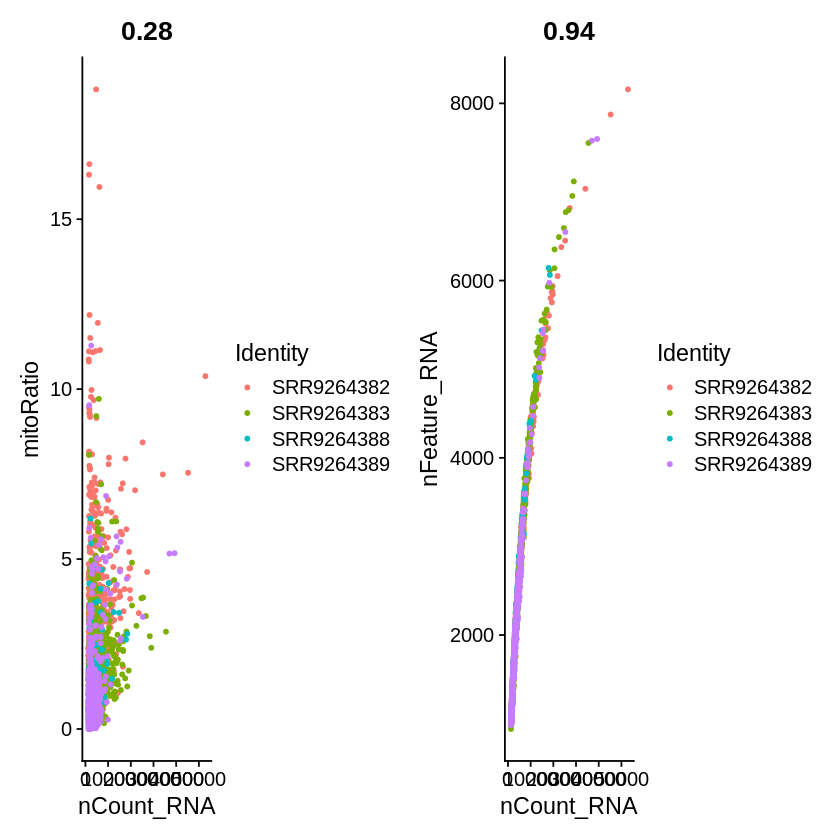

png 
  2

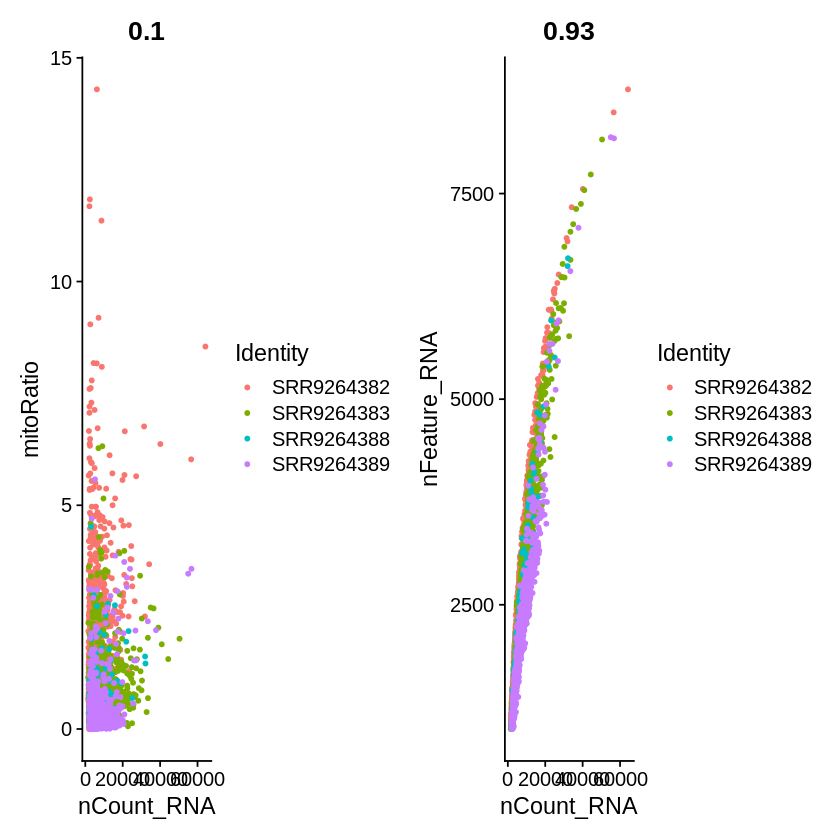

In [87]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

p <- FeatureScatter(ge_brain, feature1 = "nCount_RNA", feature2 = "mitoRatio", group.by = "sample") 
p2 <- FeatureScatter(ge_brain, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", group.by = "sample")
p + p2
p3 <- FeatureScatter(gte_brain, feature1 = "nCount_RNA", feature2 = "mitoRatio", group.by = "sample") 
p4 <- FeatureScatter(gte_brain, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", group.by = "sample")
p3 + p4

# Save figures
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_FeatureScatter.pdf", 
    width = size*2, height = size*1)
grid.arrange(p,p2, nrow=1, 
             top = "Healthy Brain samples\nhg38")
grid.arrange(p3,p4, nrow =1,
             top = "Healthy Brain samples\nhg38+Retrotransposons")
dev.off()

## Filter Cells
2021-08-05: Filter GE object, then intersect cells from GE to GETE object. 

To match the quality control from the paper, I used a mitoRatio < 5% & nGenes < 7600

In [34]:
load("/home/samkyy/scratch/gete-gbm/results/2021-08-05/ge_brainQC.RData")
load("/home/samkyy/scratch/gete-gbm/results/2021-08-05/gte_brainQC.RData")

In [35]:
ge_brain.filt <- subset(ge_brain, subset = nFeature_RNA < 7600 & mitoRatio < 10)

In [36]:
## Match rows of ge_brain to gte_brain
barcode <- colnames(ge_brain.filt)
gte_brain.filt <- subset(gte_brain, cells=barcode)
dim(gte_brain.filt)# 2689 cells
dim(ge_brain.filt) # 2689 cells

dim(ge_brain)[2] - dim(ge_brain.filt)[2] # filtered out 143 cells
dim(gte_brain)[2] - dim(gte_brain.filt)[2] # filtered out 368 cells

## filtered 200 cells less than in healthybrain notebook. 

[1] 15907  2816

[1] 14795  2816

[1] 16

[1] 241

In [37]:
save(ge_brain.filt, file="~/scratch/gete-gbm/results/2021-08-05/ge_brain.filt-v2.RData")
save(gte_brain.filt, file="~/scratch/gete-gbm/results/2021-08-05/gte_brain.filt-v2.RData")

QC after filtering

In [38]:
cellcount_GEs <- ge_brain.filt@meta.data %>%
    ggplot(aes(x=orig.ident, fill=orig.ident)) + 
    labs(fill="samples") + labs(x = "samples", y = "cell count") +
    scale_x_discrete(labels = levels(ge_brain.filt$sample)) +
    scale_fill_discrete(labels = levels(ge_brain.filt$sample)) +
    geom_bar() +
    theme_classic() +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    ggtitle("GRCh38") + theme(plot.title = element_text(hjust=0.5, face="bold"))


cellcount_gte <- gte_brain.filt@meta.data %>%
    ggplot(aes(x=orig.ident, fill=orig.ident)) + 
    labs(fill="samples") + labs(x = "samples", y = "cell count") +
    scale_x_discrete(labels = levels(gte_brain.filt$sample)) +
    scale_fill_discrete(labels = levels(gte_brain.filt$sample)) +
    geom_bar() +
    theme_classic() +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    ggtitle("GRCh38 + Retrotransposons") + theme(plot.title = element_text(hjust=0.5, face="bold"))

# Save figure of cell count
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_filt_cellcount.pdf", width = size*2, height = size)
grid.arrange(cellcount_GEs, cellcount_gte, nrow = 1, top="Healthy Controls - Post Filtering\nNumber of Cells per Dataset")
dev.off()

png 
  2

In [39]:
# Visualize QC metrics as a violin plot

p <- list(ggplot(ge_brain.filt@meta.data, aes(x=sample, y=nFeature_RNA, fill=sample)) + 
              geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("Number of Genes Per Cell") + 
              theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold")),
          ggplot(ge_brain.filt@meta.data, aes(x=sample, y=nCount_RNA, fill=sample)) + 
              geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("nCount_RNA") + 
              theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold")),
          ggplot(ge_brain.filt@meta.data, aes(x=sample, y=mitoRatio, fill=sample)) + 
            geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("mitoRatio") +
              theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold")) )
            

p2 <- list(ggplot(gte_brain.filt@meta.data, aes(x=sample, y=nFeature_RNA, fill=sample)) + 
               geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("nFeature_RNA") +
               theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold")),
          ggplot(gte_brain.filt@meta.data, aes(x=sample, y=nCount_RNA, fill=sample)) + 
               geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("nCount_RNA") +
               theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold")),
          ggplot(gte_brain.filt@meta.data, aes(x=sample, y=mitoRatio, fill=sample)) + 
               geom_violin() + theme_classic() + geom_boxplot(width=0.08,fill="white") + ggtitle("mitoRatio") +
               theme(legend.position="none", plot.title = element_text(hjust = 0.5, size = 20, face = "bold")) )

# Save figures
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_filt_Gene_Count_MitoRatio.pdf", 
    width = size*2, height = size*2)
grid.arrange(p[[1]], p[[2]],p[[3]],
             p2[[1]], p2[[2]], p2[[3]], nrow=2, 
             top = "Healthy Brain samples - Post Filtering\nhg38", 
             bottom = "Healthy Brain samples - Post Filtering\nhg38+Retrotransposons")
dev.off()

png 
  2

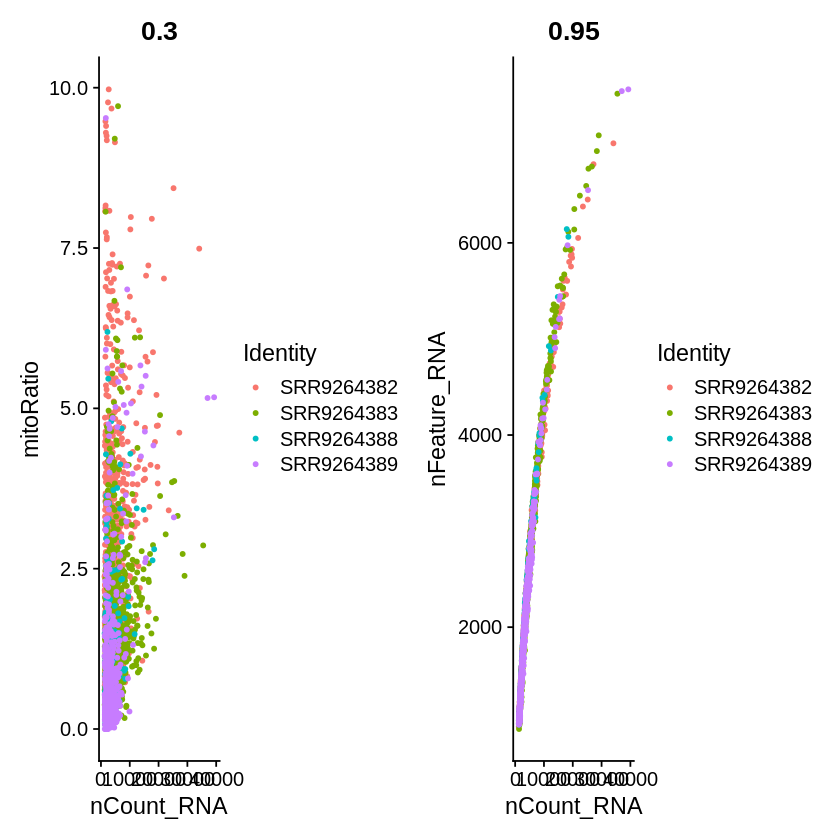

png 
  2

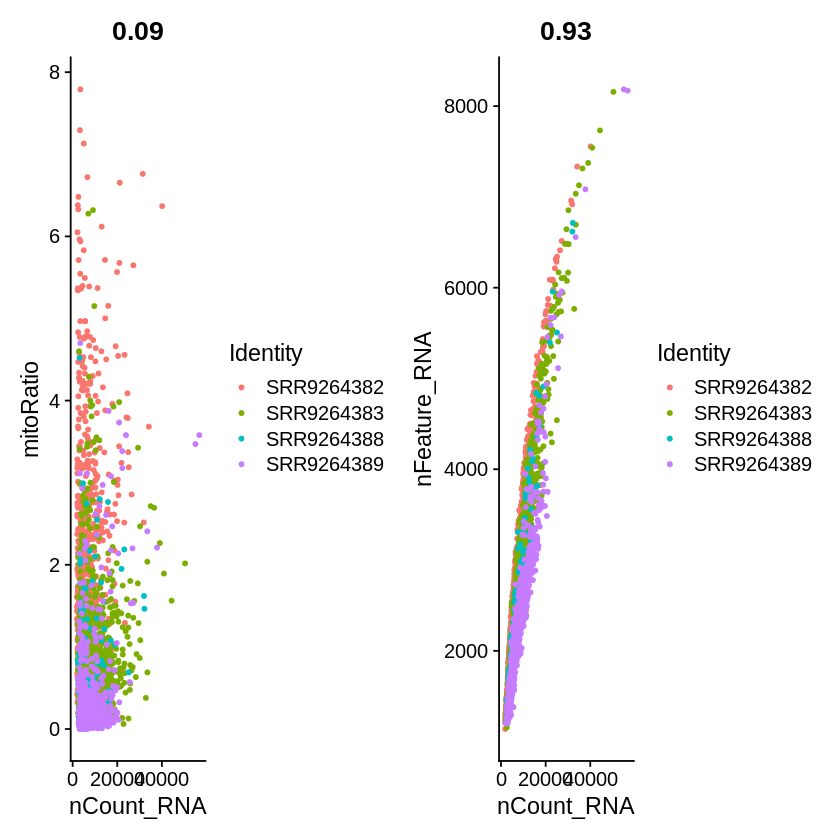

In [40]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

p <- FeatureScatter(ge_brain.filt, feature1 = "nCount_RNA", feature2 = "mitoRatio", group.by = "sample") 
p2 <- FeatureScatter(ge_brain.filt, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", group.by = "sample")
p + p2
p3 <- FeatureScatter(gte_brain.filt, feature1 = "nCount_RNA", feature2 = "mitoRatio", group.by = "sample") 
p4 <- FeatureScatter(gte_brain.filt, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", group.by = "sample")
p3 + p4

# Save figures
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_filt_FeatureScatter.pdf", 
    width = size*2, height = size*1)
grid.arrange(p,p2, nrow=1, 
             top = "Healthy Brain samples - Post Filtering\nhg38")
grid.arrange(p3,p4, nrow =1,
             top = "Healthy Brain samples - Post Filtering\nhg38+Retrotransposons")
dev.off()

## Normalize, Find Variable

In [41]:
source("~/scratch/gete-gbm/bin/util_seurat.R")

In [42]:
intObjects <- mostVariableFeatures(s_obj = list(ge_brain.filt, gte_brain.filt), meta.group = "sample")

Number of seurat objects:  2 
Splitting seurat objects by sample 


Centering and scaling data matrix



Normalize object:  1 by sample 
Processing sample : 1 
Processing sample : 2 
Processing sample : 3 
Processing sample : 4 


Centering and scaling data matrix



Normalize object:  2 by sample 
Processing sample : 1 
Processing sample : 2 
Processing sample : 3 
Processing sample : 4 


[1] 9

[1] 3

Number of seurat objects:  2 


Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 19 rows containing missing values (geom_point)."


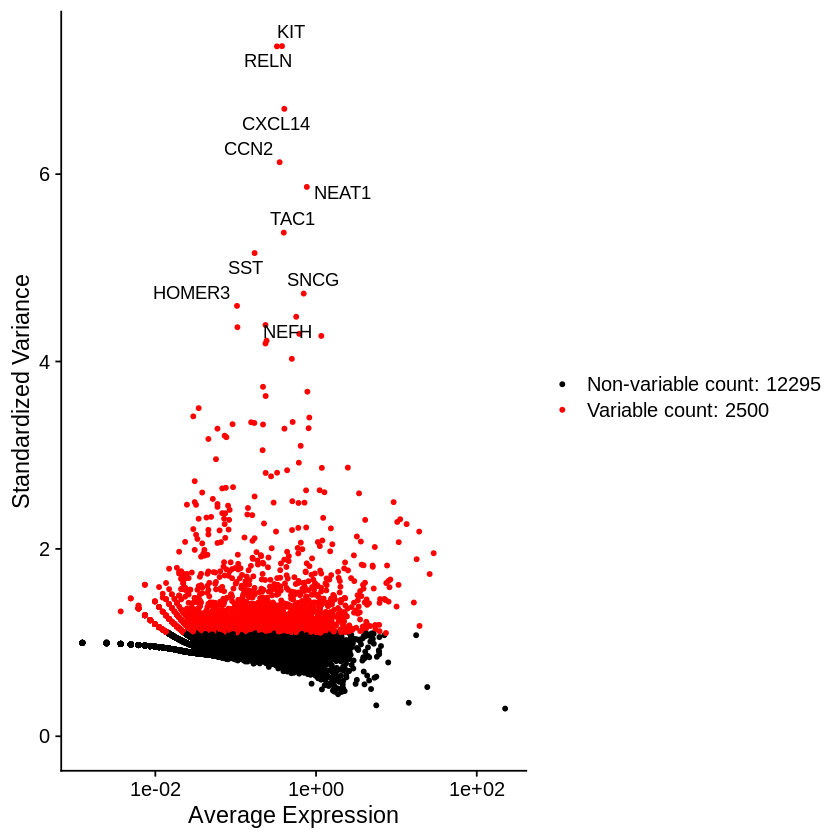

In [43]:
length(p)
length(p[[1]])

p <- top10VarFeatures(intObjects)
p[[1]][[1]]

In [44]:
# Save figures
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_top10VariableFeaturesbySample.pdf", 
    width = size*4.5, height = size*1.5)
grid.arrange(p[[1]][[1]], p[[1]][[2]],p[[1]][[3]], p[[1]][[4]],
             p[[2]][[1]], p[[2]][[2]],p[[2]][[3]], p[[1]][[4]],nrow=2, 
             top = "Healthy Brain samples\nhg38", bottom = "Healthy Brain samples\nhg38+Retrotransposons")
dev.off()

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 19 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 7 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 204 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 3 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 20 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 7 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values 

png 
  2

In [45]:
mkdirToday()
save(intObjects, file="~/scratch/gete-gbm/results/2021-08-05/ge_gte_brain-v2_findvar.RData")

[1] "Current working directory: /scratch/samkyy/gete-gbm/results/2021-08-05"


Warning message in dir.create(file.path(maindir, subdir)):
"'/home/samkyy/scratch/gete-gbm/results/2021-08-05' already exists"


[1] "New working directory: /scratch/samkyy/gete-gbm/results/2021-08-05"


In [46]:
intObjects <- integrateObjects(s_list = intObjects, folderDate = "2021-08-05", nDims = 25)

Number of seurat objects:  2 
Results Folder Date:  2021-08-05 
Results number of dimensions:  25 
Integrating seurat object:  1 
Number of samples in this seurat object 4 


Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2618 anchors

Filtering anchors

	Retained 1848 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 937 anchors

Filtering anchors

Warning message in FilterAnchors(object = object.pair, assay = assay, slot = slot, :
"Number of anchor cells is less than k.filter. Retaining all anchors."
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 944 anchors

Filtering anchors

Warning message in FilterAnchors(object = object.pair, assay = assay, slot = slot, :
"Number of anchor cells is less than k.filter. Retaining all anchors."
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2368 anchors

Filtering anchors

	Retained 1514 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2547 anchors

Filte

Object # 1 Saved
Integrating seurat object:  2 
Number of samples in this seurat object 4 


Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2592 anchors

Filtering anchors

	Retained 1965 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 933 anchors

Filtering anchors

Warning message in FilterAnchors(object = object.pair, assay = assay, slot = slot, :
"Number of anchor cells is less than k.filter. Retaining all anchors."
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 934 anchors

Filtering anchors

Warning message in FilterAnchors(object = object.pair, assay = assay, slot = slot, :
"Number of anchor cells is less than k.filter. Retaining all anchors."
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2368 anchors

Filtering anchors

	Retained 1660 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2481 anchors

Filte

Object # 2 Saved


In [47]:
file.rename(from=c("~/scratch/gete-gbm/results/2021-08-05/temp_1.rds",
                  "~/scratch/gete-gbm/results/2021-08-05/temp_2.rds"), 
           to = c("~/scratch/gete-gbm/results/2021-08-05/ge_brain-v2_int.rds",
                 "~/scratch/gete-gbm/results/2021-08-05/gte_brain-v2_int.rds"))

[1] TRUE TRUE

In [48]:
# specify that we will perform downstream analysis on the corrected data note that the original
# unmodified data still resides in the 'RNA' assay
DefaultAssay(object = intObjects[[1]]) <- "integrated"
DefaultAssay(object = intObjects[[2]]) <- "integrated"

## PCA
2021-08-05:

In [49]:
intObjects <- vector(mode="list", length=2)
intObjects[[1]] <- readRDS("~/scratch/gete-gbm/results/2021-08-05/ge_brain-v2_int.rds")
intObjects[[2]] <- readRDS("~/scratch/gete-gbm/results/2021-08-05/gte_brain-v2_int.rds")

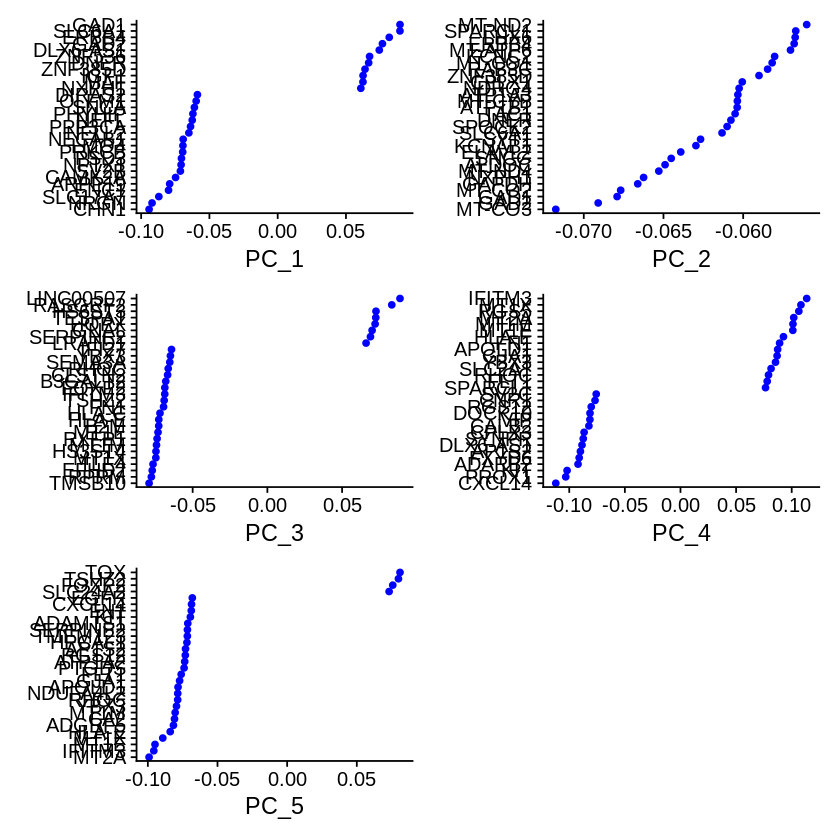

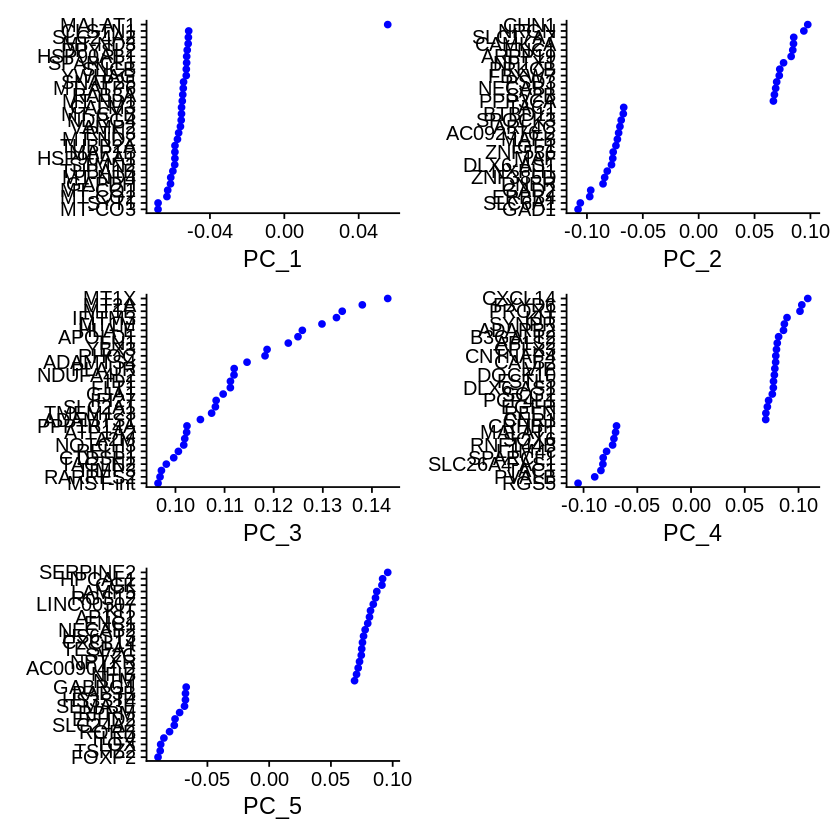

In [50]:
# Run the standard workflow for visualization and clustering (ScaleData, RunPCA, RunUMAP, FindNeighbors, FindClusters)
intObjects[[1]] <- ScaleData(object = intObjects[[1]], verbose = FALSE)
intObjects[[2]] <- ScaleData(object = intObjects[[2]], verbose = FALSE)

# Run PCA and UMAP ~10min 
intObjects[[1]] <- RunPCA(object = intObjects[[1]], npcs = 25, verbose = FALSE)
intObjects[[2]] <- RunPCA(object = intObjects[[2]], npcs = 25, verbose = FALSE)

VizDimLoadings(intObjects[[1]], dims = 1:5, reduction = "pca")
VizDimLoadings(intObjects[[2]], dims = 1:5, reduction = "pca")

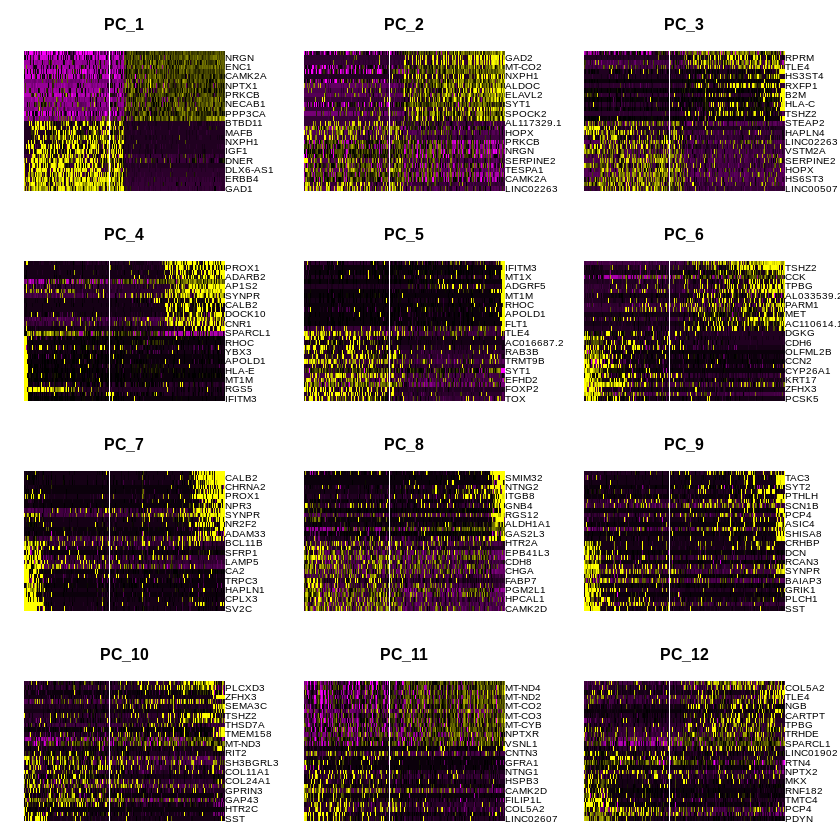

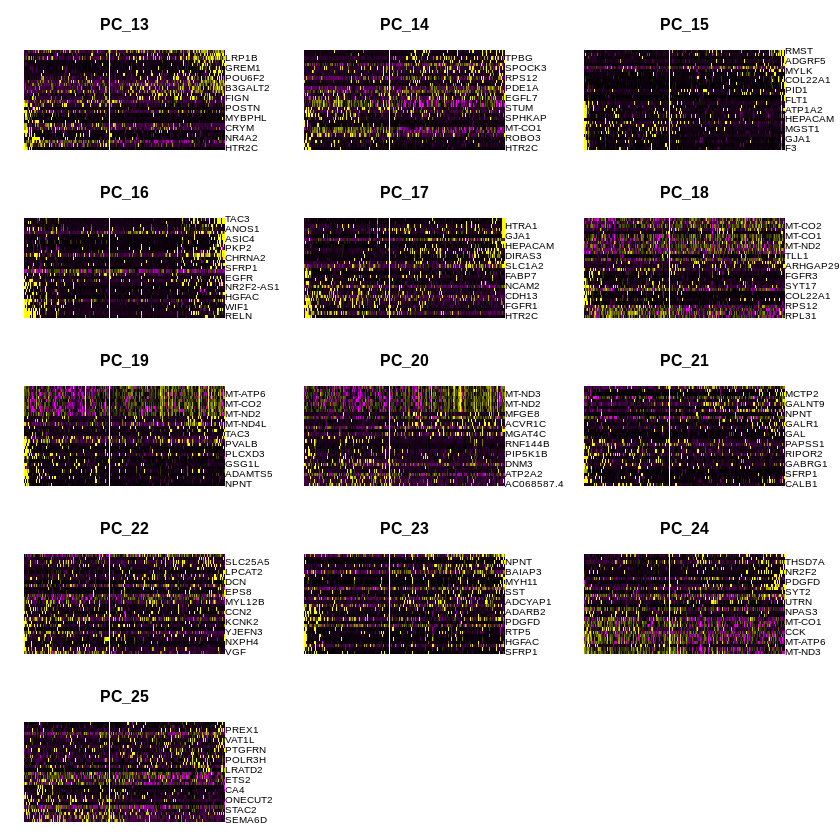

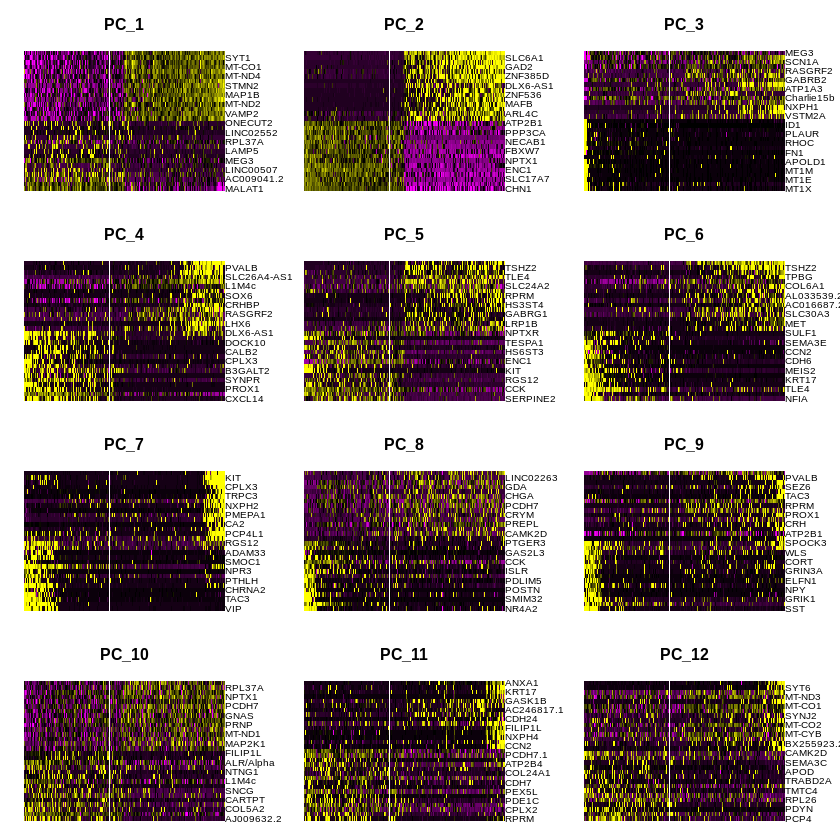

png 
  2

png 
  2

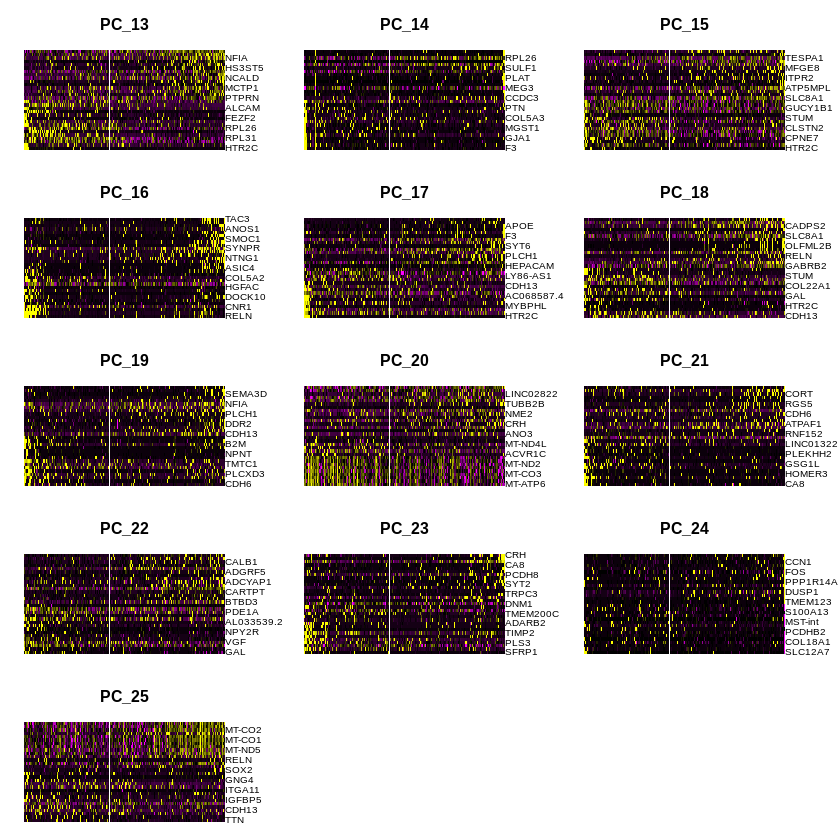

In [54]:
DimHeatmap(intObjects[[1]], dims = 1:12, cells = 1000, balanced = TRUE)
DimHeatmap(intObjects[[1]], dims = 13:25, cells = 1000, balanced = TRUE)
DimHeatmap(intObjects[[2]], dims = 1:12, cells = 1000, balanced = TRUE)
DimHeatmap(intObjects[[2]], dims = 13:25, cells = 1000, balanced = TRUE)

## Heatmaps for each PC (GE)
size <- 7
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_ge_PCHeatmaps.pdf", 
    width = size*3, height = size*7)
DimHeatmap(intObjects[[1]], dims = 1:25, cells = 1000, balanced = TRUE, ncol=3, combine = FALSE)
dev.off()

## Heatmaps for each PC (GTE)
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_gte_PCHeatmaps.pdf", 
    width = size*3, height = size*7)
DimHeatmap(intObjects[[2]], dims = 1:25, cells = 1000, balanced = TRUE, ncol=3, combine = FALSE)
dev.off()

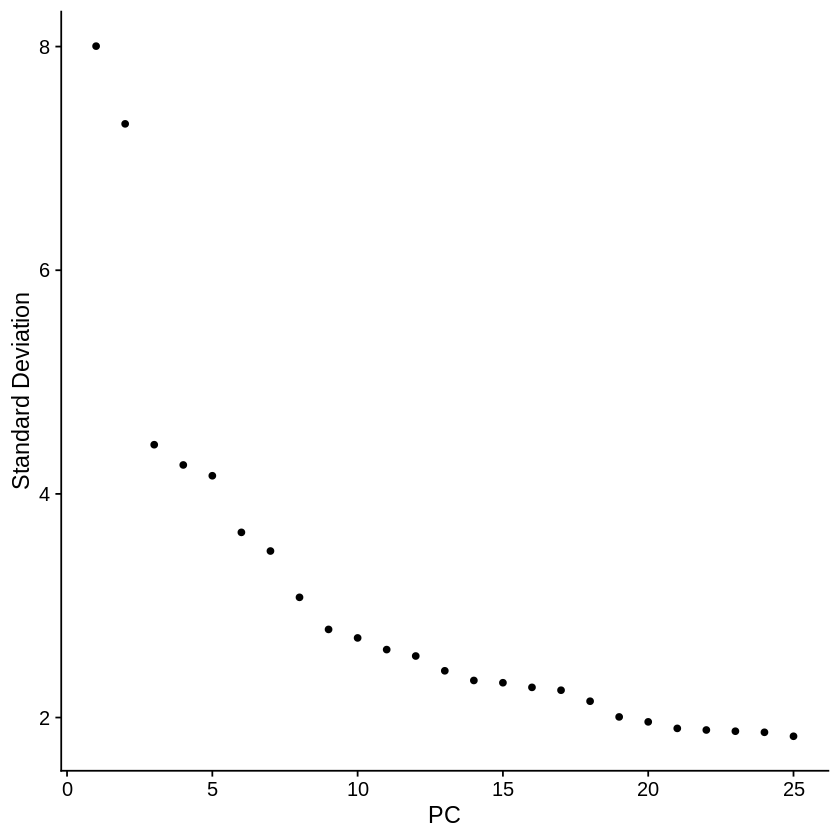

png 
  2

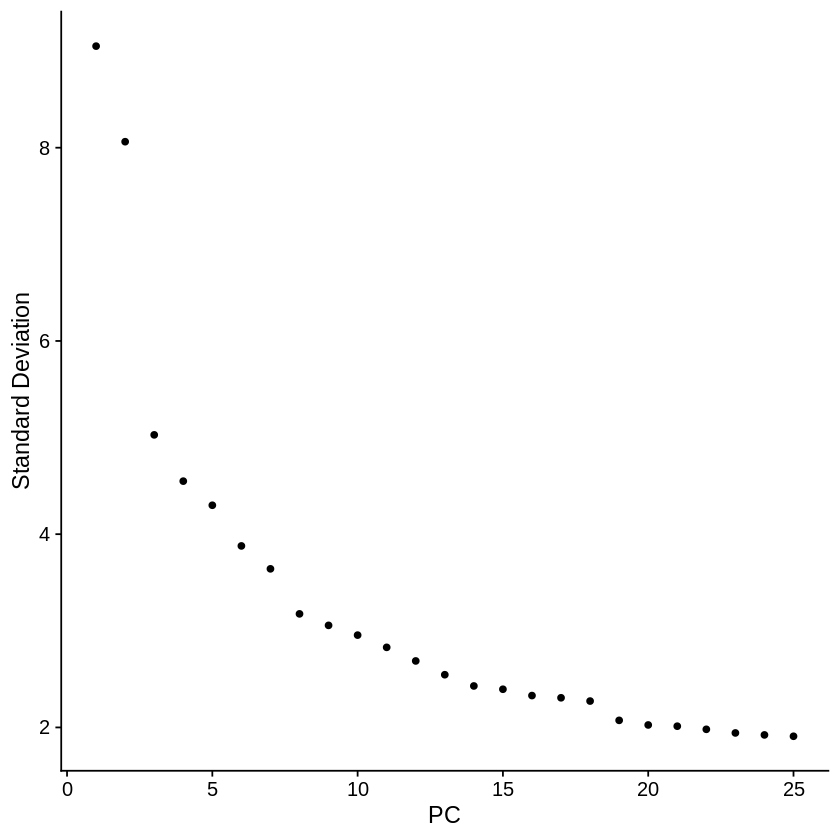

In [55]:
# Which PCAs should we include in our analyses? 
ElbowPlot(object = intObjects[[1]], ndims = 25)
ElbowPlot(object = intObjects[[2]], ndims = 25)

# Which PCAs should we include in our analyses? 
p <- ElbowPlot(object = intObjects[[1]], ndims = 25) 
p2 <- ElbowPlot(object = intObjects[[2]], ndims = 25)

pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_ge_gte_PCElbowPlots.pdf", 
    width = size*2, height = size)
grid.arrange(p, p2, nrow=1, 
             top = "Healthy Brain samples (version 2)")
dev.off()

In [56]:
# Determine percent of variation associated with each PC
pct <- intObjects[[1]][["pca"]]@stdev / sum(intObjects[[1]][["pca"]]@stdev) * 100

# Calculate cumulative percents for each PC
cumu <- cumsum(pct)

# Determine which PC exhibits cumulative percent greater than 90% and % variation associated with the PC as less than 5
co1 <- which(cumu > 90 & pct < 5)[1]

co1

# Determine the difference between variation of PC and subsequent PC
co2 <- sort(which((pct[1:length(pct) - 1] - pct[2:length(pct)]) > 0.1), decreasing = T)[1] + 1

# last point where change of % of variation is more than 0.1%.
co2

# Minimum of the two calculation
pcs <- min(co1, co2)

pcs

[1] 21

[1] 19

[1] 19

In [57]:
# Determine percent of variation associated with each PC
pct <- intObjects[[2]][["pca"]]@stdev / sum(intObjects[[2]][["pca"]]@stdev) * 100

# Calculate cumulative percents for each PC
cumu <- cumsum(pct)

# Determine which PC exhibits cumulative percent greater than 90% and % variation associated with the PC as less than 5
co1 <- which(cumu > 90 & pct < 5)[1]

co1

# Determine the difference between variation of PC and subsequent PC
co2 <- sort(which((pct[1:length(pct) - 1] - pct[2:length(pct)]) > 0.1), decreasing = T)[1] + 1

# last point where change of % of variation is more than 0.1%.
co2

# Minimum of the two calculation
pcs <- min(co1, co2)

pcs

[1] 21

[1] 19

[1] 19

In [60]:
save(intObjects, file="~/scratch/gete-gbm/results/2021-08-05/brain-v2_ge_gte_PCA.RData")

## UMAP
2021-08-05:

In [49]:
load("~/scratch/gete-gbm/results/2021-08-05/brain-v2_ge_gte_PCA.RData")

In [62]:
## Set of Principle Components to use for UMAP analysis
pc <- c(18:21)
pc
length(pc) ## We will be testing 10 PCs

[1] 18 19 20 21

[1] 4

In [63]:
## Perform UMAP analysis
ge_umaps <- vector(mode="list", length=length(pc))
gte_umaps <- vector(mode="list", length=length(pc))

names(ge_umaps) <- as.character(pc)
names(gte_umaps) <- as.character(pc)

for (i in 1:length(pc)){
    ge_umaps[[i]] <- RunUMAP(object = intObjects[[1]], 
                                 reduction = "pca", dims = 1:pc[i], umap.method = "uwot", metric = "cosine")
    gte_umaps[[i]] <- RunUMAP(object = intObjects[[2]], 
                                 reduction = "pca", dims = 1:pc[i], umap.method = "uwot", metric = "cosine")
}

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
07:43:42 UMAP embedding parameters a = 0.9922 b = 1.112

07:43:42 Read 2816 rows and found 18 numeric columns

07:43:42 Using Annoy for neighbor search, n_neighbors = 30

07:43:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:43:43 Writing NN index file to temp file /tmp/RtmpVhhzT9/file43775d247612

07:43:43 Searching Annoy index using 1 thread, search_k = 3000

07:43:44 Annoy recall = 100%

07:43:45 Commencing smooth kNN distance calibration using 1 thread

07:43:48 Initializing fro

In [64]:
## Find Neighbors
for (i in 1:length(pc)) {
    # Determine the K-nearest neighbor graph
    ge_umaps[[i]] <- FindNeighbors(ge_umaps[[i]],dims=1:pc[[i]],reduction="pca")
    gte_umaps[[i]] <- FindNeighbors(gte_umaps[[i]],dims=1:pc[[i]],reduction="pca")
}

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN



In [65]:
res <- c(0.2, 0.4, 0.6, 0.8, 1.0)

# Find Clusters with a vector of resolutions
for (i in 1:length(ge_umaps)) { ## Compute clusters for each separate umap 
    for (j in 1:length(res)) { ## Compute for each resolution
        ge_umaps[[i]] <- FindClusters(ge_umaps[[i]], resolution = res[j])
        gte_umaps[[i]] <- FindClusters(gte_umaps[[i]], resolution = res[j])
    }
}

# You can view different resolutions using:
# Idents(object = filt_gte_brain.intergrated) <- "integrated_snn_res.0.8"

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2816
Number of edges: 101252

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9527
Number of communities: 11
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2816
Number of edges: 97804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9536
Number of communities: 14
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2816
Number of edges: 101252

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9301
Number of communities: 13
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2816
Number of edges: 97804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9291
Number of communities: 14
Elapsed time: 0 seconds
Modularity Optimiz

In [66]:
p <- vector(mode="list", length=length(ge_umaps))

for (i in 1:length(ge_umaps)) {
    Idents(object = ge_umaps[[i]]) <- "integrated_snn_res.0.2"
    Idents(object = gte_umaps[[i]]) <- "integrated_snn_res.0.2"

    p[[i]][[1]] <- DimPlot(ge_umaps[[i]], reduction = "umap", group.by = "sample") + ggtitle("hg38 by Sample Origin")
    p[[i]][[2]] <- DimPlot(ge_umaps[[i]], reduction = "umap", label = TRUE, repel = TRUE) + ggtitle("hg38 by Clusters")

    p[[i]][[3]] <- DimPlot(gte_umaps[[i]], reduction = "umap", group.by = "sample") + ggtitle("hg38 by Sample Origin")
    p[[i]][[4]] <- DimPlot(gte_umaps[[i]], reduction = "umap", label = TRUE, repel = TRUE) + ggtitle("hg38 + Retrotransposons by Clusters")
}

In [67]:
# Save figures
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_umaps_PC18_r02.pdf", width = size*2, height = size*2)
grid.arrange(p[[1]][[1]], p[[1]][[2]], 
             p[[1]][[3]], p[[1]][[4]], nrow=2, top = "UMAP PC18 resolution 0.2")
dev.off()
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_umaps_PC19_r02.pdf", width = size*2, height = size*2)
grid.arrange(p[[2]][[1]], p[[2]][[2]], 
             p[[2]][[3]], p[[2]][[4]], nrow=2, top = "UMAP PC19 resolution 0.2")
dev.off()
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_umaps_PC20_r02.pdf", width = size*2, height = size*2)
grid.arrange(p[[3]][[1]], p[[3]][[2]], 
             p[[3]][[3]], p[[3]][[4]], nrow=2, top = "UMAP PC20 resolution 0.2")
dev.off()
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_umaps_PC21_r02.pdf", width = size*2, height = size*2)
grid.arrange(p[[4]][[1]], p[[4]][[2]], 
             p[[4]][[3]], p[[4]][[4]], nrow=2, top = "UMAP PC21 resolution 0.2")
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [70]:
p <- vector(mode="list", length=length(ge_umaps))

for (i in 1:length(ge_umaps)) {
    Idents(object = ge_umaps[[i]]) <- "integrated_snn_res.0.4"
    Idents(object = gte_umaps[[i]]) <- "integrated_snn_res.0.4"

    p[[i]][[1]] <- DimPlot(ge_umaps[[i]], reduction = "umap", group.by = "sample") + ggtitle("hg38 by Sample Origin")
    p[[i]][[2]] <- DimPlot(ge_umaps[[i]], reduction = "umap", label = TRUE, repel = TRUE) + ggtitle("hg38 by Clusters")

    p[[i]][[3]] <- DimPlot(gte_umaps[[i]], reduction = "umap", group.by = "sample") + ggtitle("hg38 by Sample Origin")
    p[[i]][[4]] <- DimPlot(gte_umaps[[i]], reduction = "umap", label = TRUE, repel = TRUE) + ggtitle("hg38 + Retrotransposons by Clusters")
}

In [71]:
# Save figures
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_umaps_PC18_r04.pdf", width = size*2, height = size*2)
grid.arrange(p[[1]][[1]], p[[1]][[2]], 
             p[[1]][[3]], p[[1]][[4]], nrow=2, top = "UMAP PC18 resolution 0.4")
dev.off()
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_umaps_PC19_r04.pdf", width = size*2, height = size*2)
grid.arrange(p[[2]][[1]], p[[2]][[2]], 
             p[[2]][[3]], p[[2]][[4]], nrow=2, top = "UMAP PC19 resolution 0.4")
dev.off()
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_umaps_PC20_r04.pdf", width = size*2, height = size*2)
grid.arrange(p[[3]][[1]], p[[3]][[2]], 
             p[[3]][[3]], p[[3]][[4]], nrow=2, top = "UMAP PC20 resolution 0.4")
dev.off()

png 
  2

png 
  2

png 
  2

In [72]:
p <- vector(mode="list", length=length(ge_umaps))

for (i in 1:length(ge_umaps)) {
    Idents(object = ge_umaps[[i]]) <- "integrated_snn_res.0.6"
    Idents(object = gte_umaps[[i]]) <- "integrated_snn_res.0.6"

    p[[i]][[1]] <- DimPlot(ge_umaps[[i]], reduction = "umap", group.by = "sample") + ggtitle("hg38 by Sample Origin")
    p[[i]][[2]] <- DimPlot(ge_umaps[[i]], reduction = "umap", label = TRUE, repel = TRUE) + ggtitle("hg38 by Clusters")

    p[[i]][[3]] <- DimPlot(gte_umaps[[i]], reduction = "umap", group.by = "sample") + ggtitle("hg38 by Sample Origin")
    p[[i]][[4]] <- DimPlot(gte_umaps[[i]], reduction = "umap", label = TRUE, repel = TRUE) + ggtitle("hg38 + Retrotransposons by Clusters")
}

In [73]:
# Save figures
size = 7
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_umaps_PC18_r06.pdf", width = size*2, height = size*2)
grid.arrange(p[[1]][[1]], p[[1]][[2]], 
             p[[1]][[3]], p[[1]][[4]], nrow=2, top = "UMAP PC18 resolution 0.6")
dev.off()
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_umaps_PC19_r06.pdf", width = size*2, height = size*2)
grid.arrange(p[[2]][[1]], p[[2]][[2]], 
             p[[2]][[3]], p[[2]][[4]], nrow=2, top = "UMAP PC19 resolution 0.6")
dev.off()
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_umaps_PC20_r06.pdf", width = size*2, height = size*2)
grid.arrange(p[[3]][[1]], p[[3]][[2]], 
             p[[3]][[3]], p[[3]][[4]], nrow=2, top = "UMAP PC20 resolution 0.6")
dev.off()
pdf("~/scratch/gete-gbm/results/2021-08-05/r_brain-v2_umaps_PC21_r06.pdf", width = size*2, height = size*2)
grid.arrange(p[[4]][[1]], p[[4]][[2]], 
             p[[4]][[3]], p[[4]][[4]], nrow=2, top = "UMAP PC21 resolution 0.6")
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [68]:
saveRDS(ge_umaps[["18"]], file="~/scratch/gete-gbm/results/2021-08-05/brain_ge-PC18.rds")
saveRDS(ge_umaps[["19"]], file="~/scratch/gete-gbm/results/2021-08-05/brain_ge-PC19.rds")
saveRDS(ge_umaps[["20"]], file="~/scratch/gete-gbm/results/2021-08-05/brain_ge-PC20.rds")

saveRDS(gte_umaps[["18"]], file="~/scratch/gete-gbm/results/2021-08-05/brain_ge-PC18.rds")
saveRDS(gte_umaps[["19"]], file="~/scratch/gete-gbm/results/2021-08-05/brain_gte-PC19.rds")
saveRDS(gte_umaps[["20"]], file="~/scratch/gete-gbm/results/2021-08-05/brain_gte-PC20.rds")

In [17]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /cvmfs/soft.computecanada.ca/easybuild/software/2020/Core/imkl/2020.1.217/compilers_and_libraries_2020.1.217/linux/mkl/lib/intel64_lin/libmkl_gf_lp64.so

locale:
 [1] LC_CTYPE=en_CA.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_CA.UTF-8        LC_COLLATE=en_CA.UTF-8    
 [5] LC_MONETARY=en_CA.UTF-8    LC_MESSAGES=en_CA.UTF-8   
 [7] LC_PAPER=en_CA.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_CA.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] GO.db_3.12.1            org.Hs.eg.db_3.12.0     GOstats_2.56.0         
 [4] graph_1.68.0            Category_2.56.0         ggforce_0.3.3          
 [7] RColorBrewer_1.1-2  